In [50]:
import plotly.graph_objects as go
from sqlite3 import connect
import pandas as pd
import numpy as np
from tqdm import tqdm
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


In [ ]:
# Load metadata
fn_metadata = '/resnick/groups/enceladus/glavrent/Scalable_GPs/Data/preprocessing/gm_metadata.csv'
df_metadata = pd.read_csv(fn_metadata)
df_metadata = df_metadata.loc[~np.isin(df_metadata.source_id, [1, 13, 41, 188]),:]
df_metadata.reset_index(drop=True, inplace=True)
df_metadata = df_metadata.set_index('scen_id')
print(f"Loaded metadata with {df_metadata.shape[0]} rows and {df_metadata.shape[1]} columns.")

In [20]:
# Connect to the database
conn = connect('/resnick/groups/enceladus/glavrent/Scalable_GPs/Data/preprocessing_jz/gm_db.sqlite')


In [62]:
# Scenarios to plot
np.random.seed(42)  # For reproducibility
scen_to_plot = np.random.choice(df_metadata.index, size=500, replace=False)
Rrups = df_metadata.loc[scen_to_plot, 'Rrup'].values
mags = df_metadata.loc[scen_to_plot, 'mag'].values
vs30s = df_metadata.loc[scen_to_plot, 'vs30_scec'].values
source_ids = df_metadata.loc[scen_to_plot, 'source_id'].values
res_collection = []
gmm_to_plot = 'ASK14'
fig = make_subplots(rows=2, cols=1)
for i, scen_id in tqdm(enumerate(scen_to_plot), total = len(scen_to_plot)):
    site_id = df_metadata.loc[scen_id, 'site_id']
    # Query the data
    query = f"SELECT * FROM data_sa_res_{site_id} WHERE scen_id = {scen_id}"
    df = pd.read_sql_query(query, conn)    
    # Plot the res vs Rrup
    df = df[df['gmm'] == gmm_to_plot]
    df['Rrup'] = Rrups[i]
    fig.add_trace(go.Scatter(x=df['Rrup'], y=df['res'], mode='markers', 
        name=f'Scenario {i}'), row=1, col=1)
    # Plot the res vs mag
    df['mag'] = mags[i]
    fig.add_trace(go.Scatter(x=df['mag'], y=df['res'], mode='markers', 
        name=f'Scenario {i}'), row=2, col=1)
    
    res_collection.append(df['res'].values.tolist())
# Update layout
fig.update_layout(title=f'GMM: {gmm_to_plot}', xaxis_title='Rrup', yaxis_title='Residuals',
                  xaxis2_title='Magnitude', yaxis2_title='Residuals',
                  height=800, width=1000, showlegend=True)

# Show the plot
fig.show()

100%|██████████| 500/500 [00:18<00:00, 27.27it/s]


/central/home/jyzhao/python_env/scalable_gps/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning:

Mean of empty slice.

/central/home/jyzhao/python_env/scalable_gps/lib/python3.11/site-packages/numpy/_core/_methods.py:144: RuntimeWarning:

invalid value encountered in scalar divide



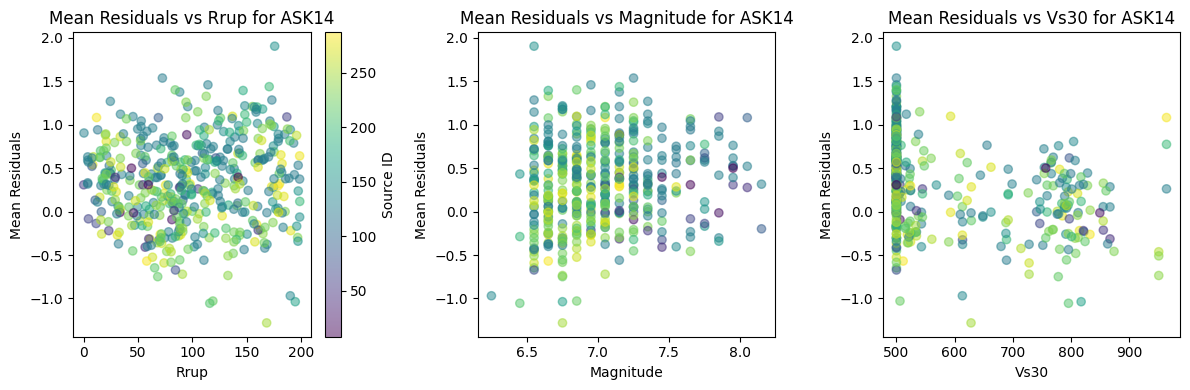

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
res_mean = np.array([np.mean(res) for res in res_collection])
scatter = ax[0].scatter(Rrups, res_mean, c=source_ids, cmap='viridis', alpha=0.5)
ax[0].set_xlabel('Rrup')
ax[0].set_ylabel('Mean Residuals')
ax[0].set_title(f'Mean Residuals vs Rrup for {gmm_to_plot}')
plt.colorbar(scatter, ax=ax[0], label='Source ID')

# Plot for Magnitude
ax[1].scatter(mags, res_mean, c=source_ids, cmap='viridis', alpha=0.5)
ax[1].set_xlabel('Magnitude')
ax[1].set_ylabel('Mean Residuals')
ax[1].set_title(f'Mean Residuals vs Magnitude for {gmm_to_plot}')

# Plot vs vs30
ax[2].scatter(vs30s, res_mean, c=source_ids, cmap='viridis', alpha=0.5)
ax[2].set_xlabel('Vs30')
ax[2].set_ylabel('Mean Residuals')
ax[2].set_title(f'Mean Residuals vs Vs30 for {gmm_to_plot}')

plt.tight_layout()
plt.show()


In [67]:
# Scenarios to plot
np.random.seed(42)  # For reproducibility
scen_to_plot = np.random.choice(df_metadata.index, size=500, replace=False)
Rrups = df_metadata.loc[scen_to_plot, 'Rrup'].values
mags = df_metadata.loc[scen_to_plot, 'mag'].values
gmm_to_plot = 'CY14'
res_collection_CY = []
fig = make_subplots(rows=2, cols=1)
for i, scen_id in tqdm(enumerate(scen_to_plot), total = len(scen_to_plot)):
    site_id = df_metadata.loc[scen_id, 'site_id']
    # Query the data
    query = f"SELECT * FROM data_sa_res_{site_id} WHERE scen_id = {scen_id}"
    df = pd.read_sql_query(query, conn)    
    # Plot the res vs Rrup
    df = df[df['gmm'] == gmm_to_plot]
    df['Rrup'] = Rrups[i]
    fig.add_trace(go.Scatter(x=df['Rrup'], y=df['res'], mode='markers', 
        name=f'Scenario {i}'), row=1, col=1)
    # Plot the res vs mag
    df['mag'] = mags[i]
    fig.add_trace(go.Scatter(x=df['mag'], y=df['res'], mode='markers', 
        name=f'Scenario {i}'), row=2, col=1)
    res_collection_CY.append(df['res'].values.tolist())
# Update layout
fig.update_layout(title=f'GMM: {gmm_to_plot}', xaxis_title='Rrup', yaxis_title='Residuals',
                  xaxis2_title='Magnitude', yaxis2_title='Residuals',
                  height=800, width=1000, showlegend=True)

# Show the plot
fig.show()

100%|██████████| 500/500 [00:18<00:00, 27.27it/s]


/central/home/jyzhao/python_env/scalable_gps/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning:

Mean of empty slice.

/central/home/jyzhao/python_env/scalable_gps/lib/python3.11/site-packages/numpy/_core/_methods.py:144: RuntimeWarning:

invalid value encountered in scalar divide



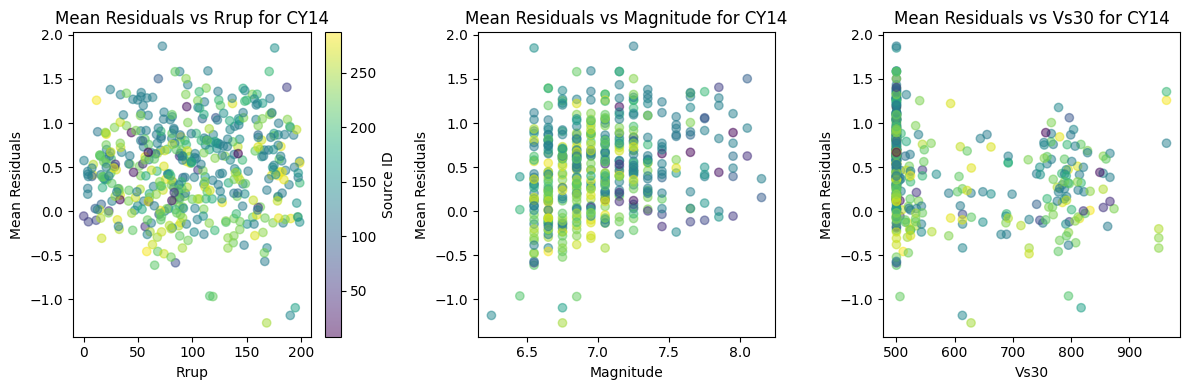

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
res_mean = np.array([np.mean(res) for res in res_collection_CY])
scatter = ax[0].scatter(Rrups, res_mean, c=source_ids, cmap='viridis', alpha=0.5)
ax[0].set_xlabel('Rrup')
ax[0].set_ylabel('Mean Residuals')
ax[0].set_title(f'Mean Residuals vs Rrup for {gmm_to_plot}')
plt.colorbar(scatter, ax=ax[0], label='Source ID')

# Plot for Magnitude
ax[1].scatter(mags, res_mean, c=source_ids, cmap='viridis', alpha=0.5)
ax[1].set_xlabel('Magnitude')
ax[1].set_ylabel('Mean Residuals')
ax[1].set_title(f'Mean Residuals vs Magnitude for {gmm_to_plot}')

# Plot vs vs30
ax[2].scatter(vs30s, res_mean, c=source_ids, cmap='viridis', alpha=0.5)
ax[2].set_xlabel('Vs30')
ax[2].set_ylabel('Mean Residuals')
ax[2].set_title(f'Mean Residuals vs Vs30 for {gmm_to_plot}')

plt.tight_layout()
plt.show()


In [69]:
df_metadata.columns

Index(['eq_id', 'source_id', 'rupture_id', 'site_id', 'site_name', 'mag',
       'dip', 'rake', 'z_tor', 'width', 'vs30_thompson', 'vs30_scec', 'z1.0',
       'z2.5', 'Rrup', 'Rfsrc', 'Rjb', 'Rx', 'Ry0', 'utm_zone',
       'source_mpt_lat', 'source_mpt_lon', 'source_mpt_x', 'source_mpt_y',
       'source_mpt_z', 'source_cst_lat', 'source_cst_lon', 'source_cst_x',
       'source_cst_y', 'source_cst_z', 'site_lat', 'site_lon', 'site_x',
       'site_y'],
      dtype='object')

In [70]:
df_metadata.utm_zone.unique()

array(['11S'], dtype=object)